In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 
%matplotlib inline  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

**DATA PREPROCESSING**

In [4]:
human=pd.read_table('human.txt')
human.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [5]:
chimp = pd.read_table('chimpanzee.txt')
chimp.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [6]:
dog = pd.read_table('dog.txt')
dog.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [7]:
human.shape

(4380, 2)

In [8]:
chimp.shape

(1682, 2)

In [9]:
dog.shape

(820, 2)

In [10]:
human["sequence"][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

In [11]:
chimp["sequence"][0]

'ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG'

In [12]:
dog["sequence"][0]

'ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAATATTTCTCACCCTCTTCATCCTATTTCAACTAAAAATTTCAAATCACTACTACCCAGAAAACCCGATAACCAAATCTGCTAAAATTGCTGGTCAACATAATCCTTGAGAAAACAAATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAA'

In [13]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [14]:
human["words"]=human.apply(lambda x: getKmers(x["sequence"]),axis=1)
human=human.drop("sequence",axis=1)
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp = chimp.drop('sequence', axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)
dog = dog.drop('sequence', axis=1)

In [15]:
human.head

<bound method NDFrame.head of       class                                              words
0         4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1         4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2         3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3         3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4         3  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...
...     ...                                                ...
4375      0  [atggaa, tggaag, ggaaga, gaagat, aagatt, agatt...
4376      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
4377      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
4378      6  [atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc...
4379      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...

[4380 rows x 2 columns]>

In [16]:
chimp.head

<bound method NDFrame.head of       class                                              words
0         4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1         4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2         4  [atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...
3         4  [atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...
4         6  [atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg...
...     ...                                                ...
1677      5  [atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg...
1678      5  [atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg...
1679      6  [atgaag, tgaagc, gaagcg, aagcga, agcgac, gcgac...
1680      3  [atgact, tgactg, gactgg, actgga, ctggaa, tggaa...
1681      3  [atgttg, tgttgc, gttgcc, ttgccc, tgccca, gccca...

[1682 rows x 2 columns]>

In [17]:
dog.head

<bound method NDFrame.head of      class                                              words
0        4  [atgcca, tgccac, gccaca, ccacag, cacagc, acagc...
1        4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2        6  [atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac...
3        6  [atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta...
4        0  [atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc...
..     ...                                                ...
815      5  [atggtc, tggtcg, ggtcgg, gtcggt, tcggtc, cggtc...
816      6  [atggcg, tggcgg, ggcggc, gcggcg, cggcga, ggcga...
817      6  [atgagc, tgagct, gagctc, agctcg, gctcgg, ctcgg...
818      1  [gccccg, ccccga, cccgag, ccgagg, cgagga, gagga...
819      6  [atggcc, tggcct, ggcctg, gcctgg, cctggg, ctggg...

[820 rows x 2 columns]>

In [18]:
human_classes = human['class'].unique()
print(human_classes)

[4 3 5 2 6 0 1]


In [19]:
chimp_classes = chimp['class'].unique()
print(chimp_classes)

[4 6 0 1 3 2 5]


In [20]:
dog_classes = dog['class'].unique()
print(dog_classes)

[4 6 0 3 2 5 1]


In [21]:
def one_hot_encode_kmers(df, kmer_length=6, max_length=None):
    mapping = {
        'A': [1, 0, 0, 0], 'T': [0, 1, 0, 0], 'C': [0, 0, 1, 0], 'G': [0, 0, 0, 1],
        'a': [1, 0, 0, 0], 't': [0, 1, 0, 0], 'c': [0, 0, 1, 0], 'g': [0, 0, 0, 1],
        'n': [0, 0, 0, 0] 
    }
    
    encoded_sequences = []
    for kmer_list in df['words']:
        encoded_kmers = []
        for kmer in kmer_list:
            encoded_kmer = []
            for base in kmer:
                encoded_kmer.extend(mapping.get(base, [0, 0, 0, 0]))
            encoded_kmers.extend(encoded_kmer)
        if max_length:
            if len(encoded_kmers) < max_length:
                encoded_kmers.extend([0] * (max_length - len(encoded_kmers)))
            else:
                encoded_kmers = encoded_kmers[:max_length]
        
        encoded_sequences.append(encoded_kmers)
    
    return np.array(encoded_sequences)

max_length = 1000

X_human = one_hot_encode_kmers(human, max_length=max_length)
y_human = to_categorical(human['class'], num_classes=7)

X_chimp = one_hot_encode_kmers(chimp, max_length=max_length)
y_chimp = to_categorical(chimp['class'], num_classes=7)

X_dog = one_hot_encode_kmers(dog, max_length=max_length)
y_dog = to_categorical(dog['class'], num_classes=7)

In [22]:
X_human.shape

(4380, 1000)

In [23]:
X_human = X_human.reshape((X_human.shape[0], -1, 5))

In [24]:
X_chimp = X_chimp.reshape((X_chimp.shape[0], -1, 5))

In [25]:
X_dog = X_dog.reshape((X_dog.shape[0], -1, 5))

In [26]:
X_human.shape

(4380, 200, 5)

In [27]:
from sklearn.model_selection import train_test_split
X_human_train, X_human_tv, y_human_train, y_human_tv = train_test_split(X_human, y_human, test_size=0.2, random_state=42)
X_chimp_train, X_chimp_tv, y_chimp_train, y_chimp_tv = train_test_split(X_chimp, y_chimp, test_size=0.2, random_state=42)
X_dog_train, X_dog_tv, y_dog_train, y_dog_tv = train_test_split(X_dog, y_dog, test_size=0.2, random_state=42)

In [28]:
X_human_test, X_human_val, y_human_test, y_human_val = train_test_split(X_human_tv, y_human_tv, test_size=0.5, random_state=42)
X_chimp_test, X_chimp_val, y_chimp_test, y_chimp_val = train_test_split(X_chimp_tv, y_chimp_tv, test_size=0.5, random_state=42)
X_dog_test, X_dog_val, y_dog_test, y_dog_val = train_test_split(X_dog_tv, y_dog_tv, test_size=0.5, random_state=42)

In [29]:
X_combined = np.concatenate((X_human_train, X_chimp_train,X_dog_train), axis=0)
Y_combined = np.concatenate((y_human_train, y_chimp_train,y_dog_train), axis=0)
X_combinedtest = np.concatenate((X_human_test, X_chimp_test,X_dog_test), axis=0)
Y_combinedtest = np.concatenate((y_human_test, y_chimp_test,y_dog_test), axis=0)
X_combinedval = np.concatenate((X_human_val, X_chimp_val,X_dog_val), axis=0)
Y_combinedval = np.concatenate((y_human_val, y_chimp_val,y_dog_val), axis=0)

In [30]:
print(f"Training set: {X_combined.shape}, Validation set: {X_combinedval.shape}, Testing set: {X_combinedtest.shape}")

Training set: (5505, 200, 5), Validation set: (689, 200, 5), Testing set: (688, 200, 5)


**CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [31]:
from tensorflow.keras.layers import Input
model1 = Sequential([
    Input(shape=(X_human.shape[1], 5)),
    Conv1D(32, kernel_size=3, activation='relu'), 
    MaxPooling1D(pool_size=2),
    Dropout(0.25), 
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

In [32]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = model1.fit(
    X_human_train, y_human_train,
    validation_data=(X_human_val, y_human_val),
    epochs=30,
    batch_size=32  
)

Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3057 - loss: 1.8473 - val_accuracy: 0.3881 - val_loss: 1.5851
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4387 - loss: 1.5010 - val_accuracy: 0.4772 - val_loss: 1.4356
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5214 - loss: 1.3621 - val_accuracy: 0.6119 - val_loss: 1.2968
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5897 - loss: 1.2028 - val_accuracy: 0.6324 - val_loss: 1.1594
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6111 - loss: 1.1040 - val_accuracy: 0.6370 - val_loss: 1.0791
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6587 - loss: 1.0247 - val_accuracy: 0.6826 - val_loss: 1.0026
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7015 - loss: 0.9085 - val_accuracy: 0.6849 - val_loss: 0.9342
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7117 - loss: 0.8588 - val_accuracy: 0.

In [34]:
y_human_pred = model1.predict(X_human_test)
y_human_pred_classes = np.argmax(y_human_pred, axis=1)
y_human_true_classes = np.argmax(y_human_test, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Accuracy: 0.8059360730593608
Precision: 0.8224284075150254
Recall: 0.8059360730593608
F1 Score: 0.8067464268256458
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        51
           1       0.92      0.73      0.81        48
           2       1.00      0.75      0.86        44
           3       0.89      0.80      0.84        61
           4       0.74      0.86      0.80        74
           5       0.82      0.67      0.73        27
           6       0.73      0.88      0.80       133

    accuracy                           0.81       438
   macro avg       0.85      0.77      0.80       438
weighted avg       0.82      0.81      0.81       438



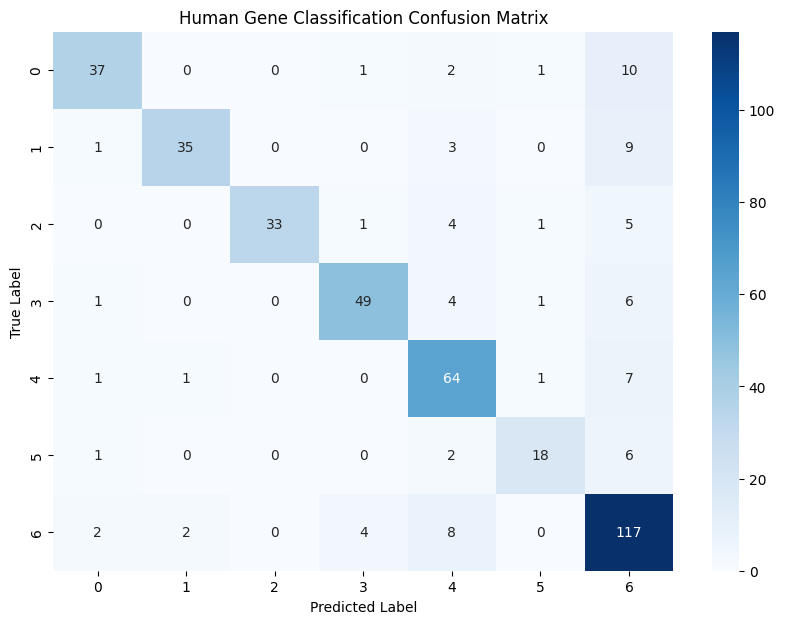

In [35]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Accuracy:", accuracy_score(y_human_true_classes, y_human_pred_classes))
precision = precision_score(y_human_true_classes, y_human_pred_classes, average='weighted')
recall = recall_score(y_human_true_classes, y_human_pred_classes, average='weighted')
f1 = f1_score(y_human_true_classes, y_human_pred_classes, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_human_true_classes, y_human_pred_classes))
conf_matrix = confusion_matrix(y_human_true_classes, y_human_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Human Gene Classification Confusion Matrix")
plt.show()


In [36]:
y_chimp_pred = model1.predict(X_chimp)
y_chimp_pred_classes = np.argmax(y_chimp_pred, axis=1)
y_chimp_true_classes = np.argmax(y_chimp, axis=1)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy: 0.8632580261593341
Precision: 0.868963433533544
Recall: 0.8632580261593341
F1 Score: 0.8635270854398002
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       234
           1       0.97      0.82      0.89       185
           2       0.93      0.81      0.86       144
           3       0.84      0.84      0.84       228
           4       0.77      0.87      0.82       261
           5       0.95      0.75      0.84       109
           6       0.85      0.92      0.88       521

    accuracy                           0.86      1682
   macro avg       0.89      0.84      0.86      1682
weighted avg       0.87      0.86      0.86      1682



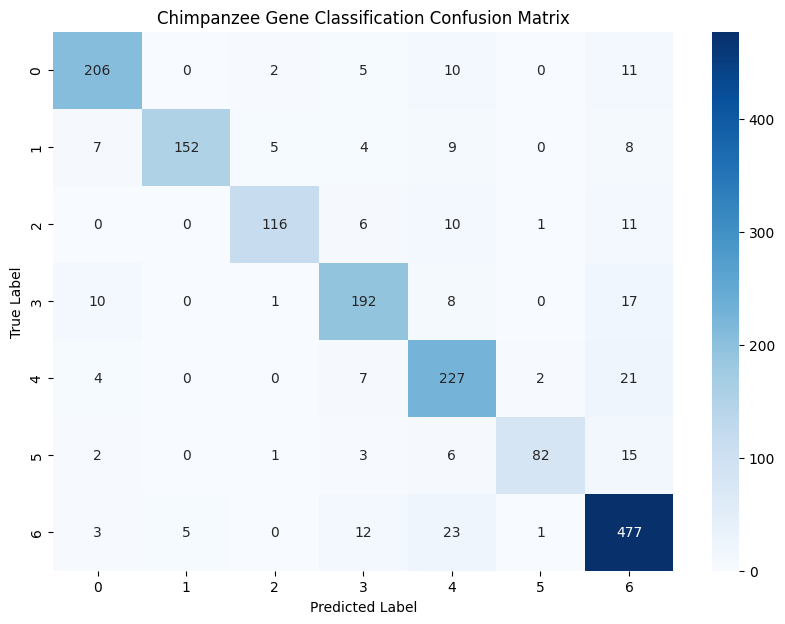

In [37]:
print("Accuracy:", accuracy_score(y_chimp_true_classes, y_chimp_pred_classes))
precision = precision_score(y_chimp_true_classes, y_chimp_pred_classes, average='weighted')
recall = recall_score(y_chimp_true_classes, y_chimp_pred_classes, average='weighted')
f1 = f1_score(y_chimp_true_classes, y_chimp_pred_classes, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_chimp_true_classes, y_chimp_pred_classes))
conf_matrix = confusion_matrix(y_chimp_true_classes, y_chimp_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Chimpanzee Gene Classification Confusion Matrix")
plt.show()

In [38]:
y_dog_pred = model1.predict(X_dog)
y_dog_pred_classes = np.argmax(y_dog_pred, axis=1)
y_dog_true_classes = np.argmax(y_dog, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy: 0.5902439024390244
Precision: 0.6068083157380886
Recall: 0.5902439024390244
F1 Score: 0.5784960380755445
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.44      0.53       131
           1       0.65      0.47      0.54        75
           2       0.83      0.45      0.59        64
           3       0.53      0.51      0.52        95
           4       0.52      0.67      0.59       135
           5       0.59      0.27      0.37        60
           6       0.59      0.80      0.68       260

    accuracy                           0.59       820
   macro avg       0.62      0.51      0.54       820
weighted avg       0.61      0.59      0.58       820



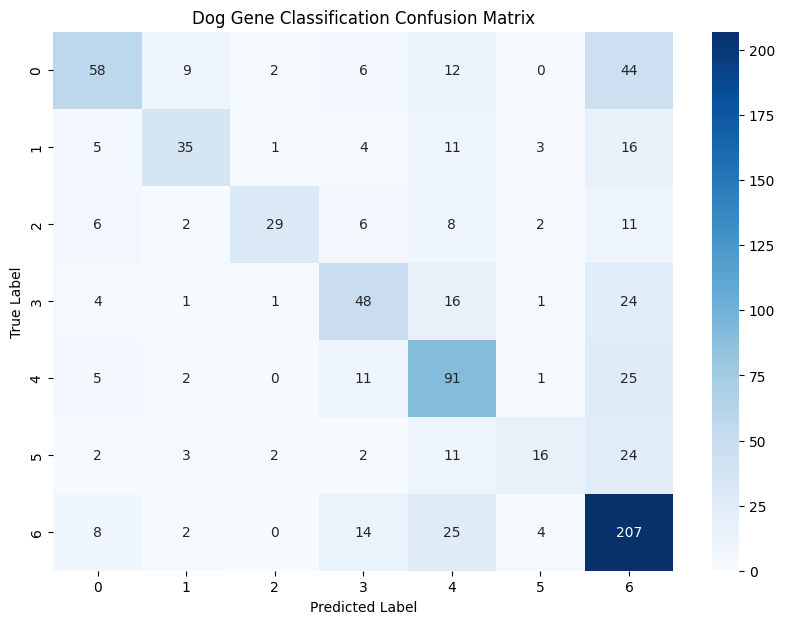

In [39]:
print("Accuracy:", accuracy_score(y_dog_true_classes, y_dog_pred_classes))
precision = precision_score(y_dog_true_classes, y_dog_pred_classes, average='weighted')
recall = recall_score(y_dog_true_classes, y_dog_pred_classes, average='weighted')
f1 = f1_score(y_dog_true_classes, y_dog_pred_classes, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_dog_true_classes, y_dog_pred_classes))
conf_matrix = confusion_matrix(y_dog_true_classes, y_dog_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Dog Gene Classification Confusion Matrix")
plt.show()

In [61]:
from tensorflow.keras.layers import Input
model2 = Sequential([
    Input(shape=(X_chimp.shape[1], 5)),
    Conv1D(32, kernel_size=3, activation='relu'), 
    MaxPooling1D(pool_size=2),
    Dropout(0.25), 
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

In [62]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
history = model2.fit(
    X_chimp_train, y_chimp_train,
    validation_data=(X_chimp_val, y_chimp_val),
    epochs=30,
    batch_size=32  
)

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2421 - loss: 1.9726 - val_accuracy: 0.3491 - val_loss: 1.7760
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3276 - loss: 1.7693 - val_accuracy: 0.3846 - val_loss: 1.7314
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3976 - loss: 1.6299 - val_accuracy: 0.3669 - val_loss: 1.6904
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4140 - loss: 1.5489 - val_accuracy: 0.4083 - val_loss: 1.6545
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4613 - loss: 1.4518 - val_accuracy: 0.4438 - val_loss: 1.5729
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5206 - loss: 1.3494 - val_accuracy: 0.4497 - val_loss: 1.5667
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5421 - loss: 1.2975 - val_accuracy: 0.4675 - val_loss: 1.5383
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5765 - loss: 1.2182 - val_accuracy: 0.4556 - val_loss

In [64]:
y_chimp_pred2 = model2.predict(X_chimp_test)
y_chimp_pred_classes2 = np.argmax(y_chimp_pred2, axis=1)
y_chimp_true_classes2 = np.argmax(y_chimp_test, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Accuracy: 0.7142857142857143
Precision: 0.7196257848431761
Recall: 0.7142857142857143
F1 Score: 0.7116812685794746
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.85      0.65      0.73        17
           2       0.62      0.71      0.67        14
           3       0.67      0.75      0.71        24
           4       0.70      0.64      0.67        25
           5       0.75      0.46      0.57        13
           6       0.74      0.80      0.77        61

    accuracy                           0.71       168
   macro avg       0.71      0.68      0.69       168
weighted avg       0.72      0.71      0.71       168



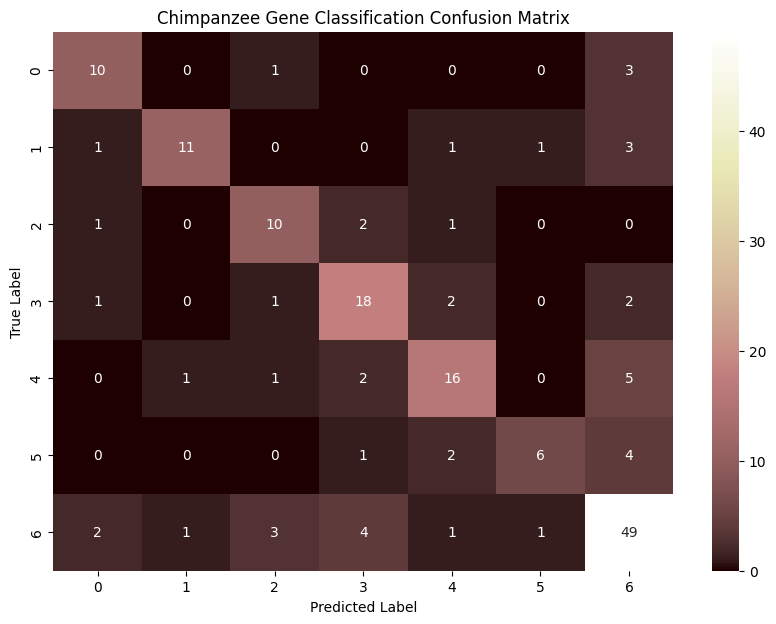

In [65]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Accuracy:", accuracy_score(y_chimp_true_classes2, y_chimp_pred_classes2))
precision = precision_score(y_chimp_true_classes2, y_chimp_pred_classes2, average='weighted')
recall = recall_score(y_chimp_true_classes2, y_chimp_pred_classes2, average='weighted')
f1 = f1_score(y_chimp_true_classes2, y_chimp_pred_classes2, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_chimp_true_classes2, y_chimp_pred_classes2))
conf_matrix = confusion_matrix(y_chimp_true_classes2, y_chimp_pred_classes2)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="pink")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Chimpanzee Gene Classification Confusion Matrix")
plt.show()

In [66]:
y_dog_pred2 = model2.predict(X_dog)
y_dog_pred_classes2 = np.argmax(y_dog_pred2, axis=1)
y_dog_true_classes2 = np.argmax(y_dog, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Accuracy: 0.5439024390243903
Precision: 0.5651169673926081
Recall: 0.5439024390243903
F1 Score: 0.5311119680721589
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53       131
           1       0.52      0.40      0.45        75
           2       0.53      0.39      0.45        64
           3       0.47      0.49      0.48        95
           4       0.57      0.47      0.52       135
           5       0.93      0.23      0.37        60
           6       0.55      0.77      0.64       260

    accuracy                           0.54       820
   macro avg       0.59      0.47      0.49       820
weighted avg       0.57      0.54      0.53       820



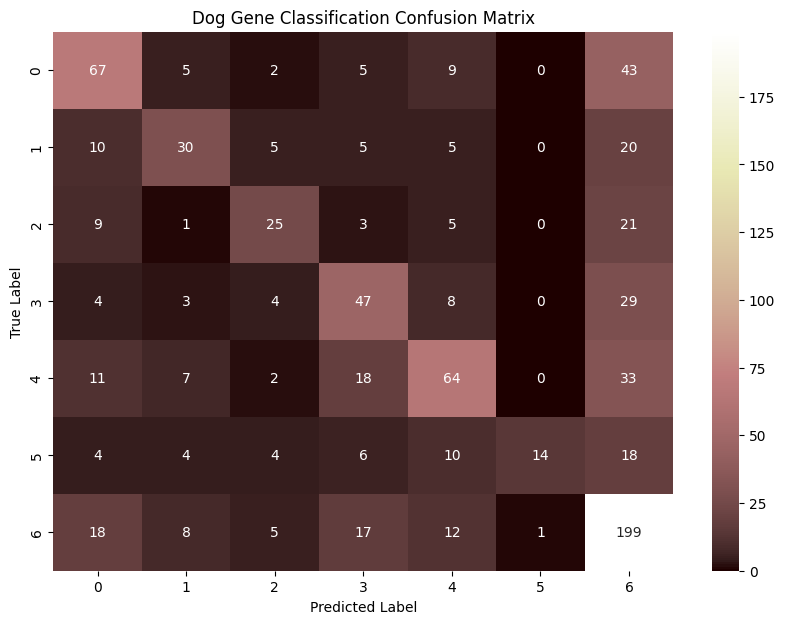

In [67]:
print("Accuracy:", accuracy_score(y_dog_true_classes2, y_dog_pred_classes2))
precision = precision_score(y_dog_true_classes2, y_dog_pred_classes2, average='weighted')
recall = recall_score(y_dog_true_classes2, y_dog_pred_classes2, average='weighted')
f1 = f1_score(y_dog_true_classes2, y_dog_pred_classes2, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_dog_true_classes2, y_dog_pred_classes2))
conf_matrix = confusion_matrix(y_dog_true_classes2, y_dog_pred_classes2)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="pink")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Dog Gene Classification Confusion Matrix")
plt.show()

In [68]:
y_human_pred2 = model2.predict(X_human)
y_human_pred_classes2 = np.argmax(y_human_pred2, axis=1)
y_human_true_classes2 = np.argmax(y_human, axis=1)

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Accuracy: 0.7242009132420091
Precision: 0.733030217140207
Recall: 0.7242009132420091
F1 Score: 0.7226879182786881
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.73       531
           1       0.82      0.74      0.78       534
           2       0.76      0.61      0.68       349
           3       0.73      0.69      0.71       672
           4       0.76      0.65      0.70       711
           5       0.84      0.54      0.66       240
           6       0.67      0.82      0.74      1343

    accuracy                           0.72      4380
   macro avg       0.75      0.69      0.71      4380
weighted avg       0.73      0.72      0.72      4380



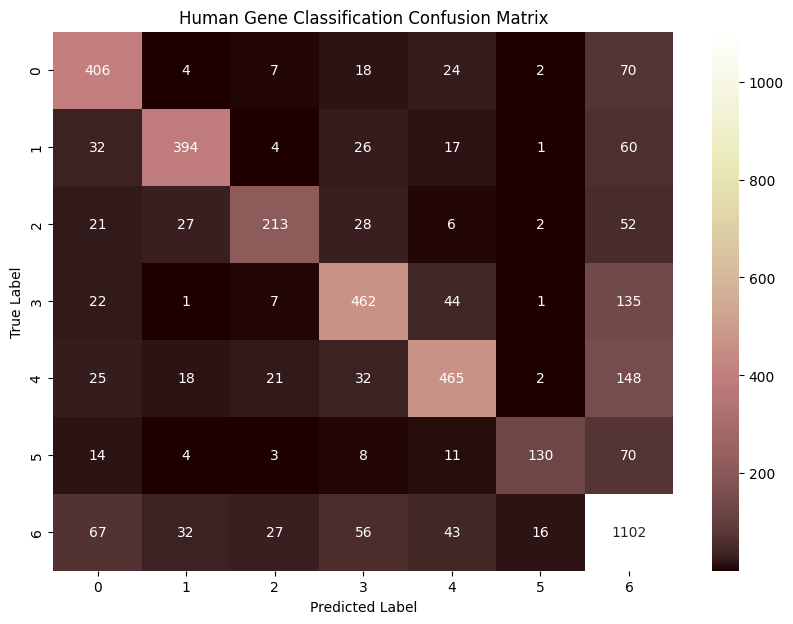

In [69]:
print("Accuracy:", accuracy_score(y_human_true_classes2, y_human_pred_classes2))
precision = precision_score(y_human_true_classes2, y_human_pred_classes2, average='weighted')
recall = recall_score(y_human_true_classes2, y_human_pred_classes2, average='weighted')
f1 = f1_score(y_human_true_classes2, y_human_pred_classes2, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_human_true_classes2, y_human_pred_classes2))
conf_matrix = confusion_matrix(y_human_true_classes2, y_human_pred_classes2)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="pink")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Human Gene Classification Confusion Matrix")
plt.show()

**LSTM**

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
modellstm = Sequential([
    LSTM(128, activation='tanh', input_shape=(X_human_train.shape[1], X_human_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='tanh', return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 classes
])
modellstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = modellstm.fit(
    X_human_train, y_human_train,
    validation_data=(X_human_val, y_human_val),
    epochs=30,
    batch_size=16
)


Epoch 1/30


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 111ms/step - accuracy: 0.3122 - loss: 1.8350 - val_accuracy: 0.3014 - val_loss: 1.8053
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.2976 - loss: 1.8176 - val_accuracy: 0.3037 - val_loss: 1.7498
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.3212 - loss: 1.7698 - val_accuracy: 0.3242 - val_loss: 1.7386
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.3335 - loss: 1.7313 - val_accuracy: 0.3470 - val_loss: 1.6966
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.3603 - loss: 1.6955 - val_accuracy: 0.3676 - val_loss: 1.6920
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.3891 - loss: 1.6241 - val_accuracy: 0.3836 - val_loss: 1.6289
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.4031 - loss: 1.5753 - val_accuracy: 0.3562 - val_loss: 1.6138
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.4251 - loss: 1.5250 - val_

In [72]:
y_human_pred3 = modellstm.predict(X_human_test)
y_human_pred_classes3 = np.argmax(y_human_pred3, axis=1)
y_human_true_classes3 = np.argmax(y_human_test, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


Accuracy: 0.7146118721461188
Precision: 0.719356241541364
Recall: 0.7146118721461188
F1 Score: 0.7120211395939511
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62        51
           1       0.64      0.71      0.67        48
           2       0.84      0.61      0.71        44
           3       0.71      0.74      0.73        61
           4       0.78      0.76      0.77        74
           5       0.72      0.48      0.58        27
           6       0.70      0.81      0.75       133

    accuracy                           0.71       438
   macro avg       0.72      0.67      0.69       438
weighted avg       0.72      0.71      0.71       438



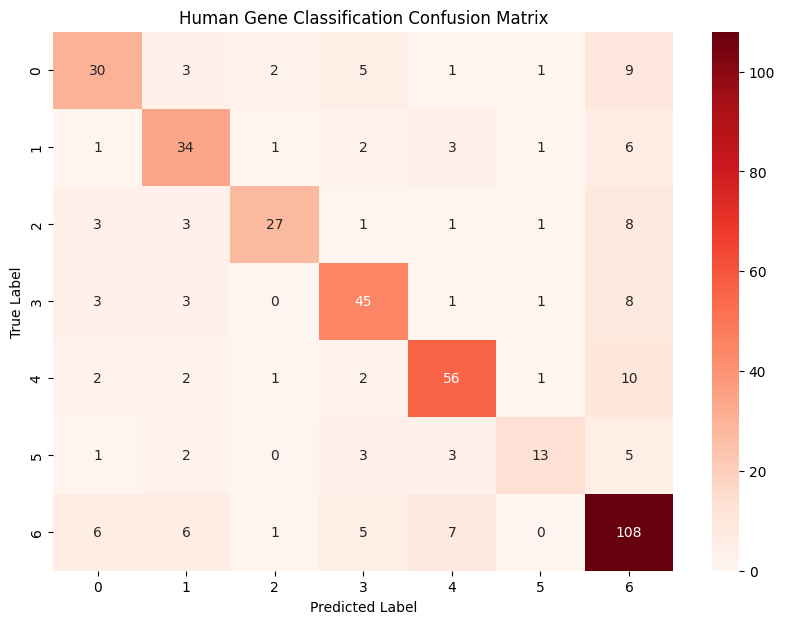

In [80]:
print("Accuracy:", accuracy_score(y_human_true_classes3, y_human_pred_classes3))
precision = precision_score(y_human_true_classes3, y_human_pred_classes3, average='weighted')
recall = recall_score(y_human_true_classes3, y_human_pred_classes3, average='weighted')
f1 = f1_score(y_human_true_classes3, y_human_pred_classes3, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_human_true_classes3, y_human_pred_classes3))
conf_matrix = confusion_matrix(y_human_true_classes3, y_human_pred_classes3)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Reds')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Human Gene Classification Confusion Matrix")
plt.show()